<a href="https://colab.research.google.com/github/KuVadym/Data_Science_goit/blob/main/hw10/hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [3]:
def load_dataset():
    # завантажимо датасет
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    # one hot encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, y_train, x_test, y_test

In [4]:
def prep_pixels(train, test):
    x_train = train.astype('float32')
    x_test = test.astype('float32')
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    return x_train, x_test

In [5]:
g_i = 0
# відмальовка значень при навчанні мережі
def summarize_diagnostics(history):
    # відмальовка loss-у
    pyplot.subplot(211)
    pyplot.title('Перехресна втрата ентропії')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # відмальовка точності
    pyplot.subplot(212)
    pyplot.title('Точність класифікації')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # Збередення графіку у файл
    global g_i
    filename = str(g_i)
    g_i += 1
    pyplot.show()
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

In [6]:
def run_test_harness():
    # завантажимо датасет
    trainX, trainY, testX, testY = load_dataset()
    # підготуємо піксельні дані
    trainX, testX = prep_pixels(trainX, testX)
    # визначимо модель
    model = define_model()
    # "зафітимо" модель
    history = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY))
    # вкажемо точність натренованої моделі
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # відмалюємо графіки
    summarize_diagnostics(history)

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        3692

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
938/938 [==============================] - 16s 8ms/step - loss: 0.9106 - accuracy: 0.6647 - val_loss: 0.5567 - val_accuracy: 0.7846
Epoch 2/30
938/938 [==============================] - 7s 8ms/step - loss: 0.5705 - accuracy: 0.7883 - val_loss: 0.4602 - val_accuracy: 0.8277
Epoch 3/30
938/938 [==============================] - 7s 8ms/step - loss: 0.4969 - accuracy: 0.8160 - val_loss: 0.4138 - val_accuracy: 0.8471
Epoch 4/30
938/938 [==============================] - 7s 8ms/step - loss: 0.4469 - accuracy: 0.8366 - val_loss: 0.3811 - val_accuracy: 0.8631
Epoch 5/30
938/938 [==============================] - 7s 8ms/step - loss: 0.4137 - accuracy: 0.8481 - val_loss: 0.3496 - val_accuracy: 0.8726
Epoch 6/30
938/938 [==============================] - 7s 8ms/step - loss: 0.3848 - accuracy: 0.8584 - val_loss: 0.3310 - val_accuracy: 0.8785
Epoch 7/30
938/938 [==============================] - 8s 8ms/step - loss: 0.3661 - accuracy: 0.8652 - val_loss: 0.3182 - val_accuracy: 0.8841
Epoch

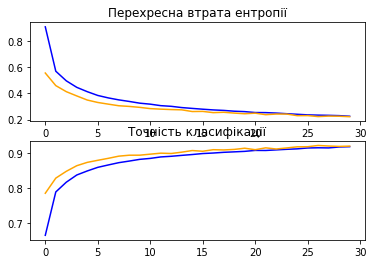

In [7]:
from keras.layers import Dropout

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	model.summary()
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
run_test_harness()